In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df_h = pd.read_csv("../datasets/hour.csv")
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df = pd.read_csv("../datasets/day.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_h.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# df.drop(columns="season", inplace=True)

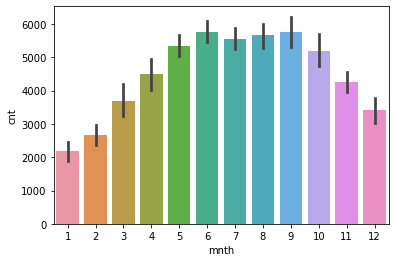

In [7]:
sns.barplot(data=df, x = "mnth", y="cnt")

In [8]:
def x(r):
  if r in [1, 2, 12]:
    return "1"
  elif r in [3, 4, 5]:
    return "2"
  elif r in [6, 7, 8]:
    return "3"
  else:
    return "4"

In [9]:
df["season"] = df["mnth"].apply(x)

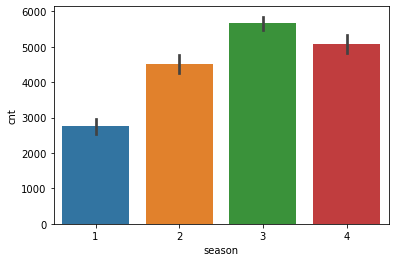

In [10]:
sns.barplot(data=df, x = "season", y="cnt")

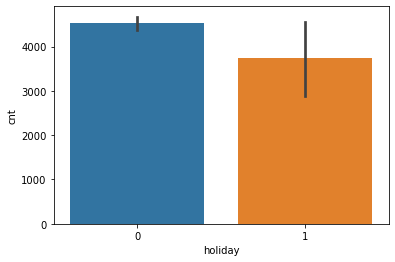

In [11]:
sns.barplot(data=df, x = "holiday", y="cnt")

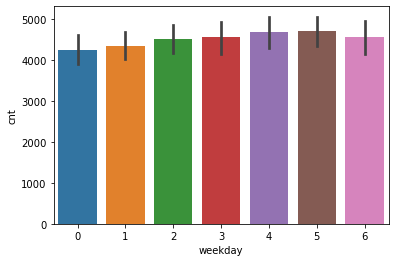

In [12]:
sns.barplot(data=df, x = "weekday", y="cnt")

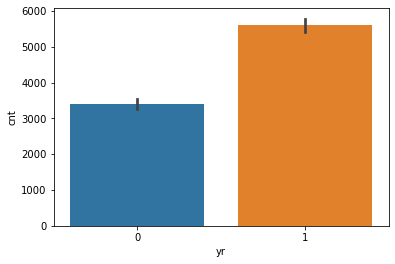

In [13]:
sns.barplot(data=df, x = "yr", y="cnt")

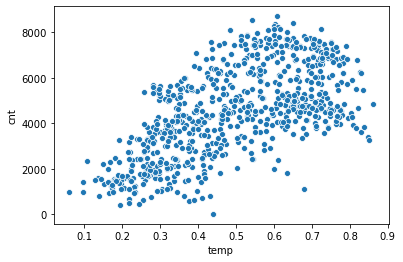

In [14]:
sns.scatterplot(data=df, x = "temp", y="cnt")

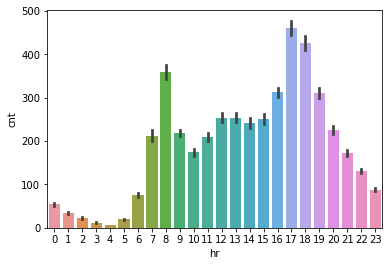

In [15]:
sns.barplot(data=df_h, x = "hr", y="cnt")

In [16]:
df_h["cnt"].sum()/df.shape[0]

4504.3488372093025

In [17]:
def get_best(ks, rmse):
    min_rmse = min(rmse)
    return ks[rmse.index(min_rmse)], min_rmse

In [18]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [19]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_train)
    rmse_tr = rmse(predictions, y_train)
    predictions = regr.predict(X_test)
    rmse_te = rmse(predictions, y_test)
    return rmse_tr, rmse_te

In [20]:
def for_feat_sel(n, k, X_train, y_train):
    remaining = list(range(X_train.shape[1]))
    selected = []
    while len(selected) < n:
        rmse_min = 1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(KNeighborsRegressor(n_neighbors=k, algorithm='brute', p=1), X_i, y_train,
            scoring='neg_mean_squared_error', cv=5)
            rmse = np.sqrt(-scores.mean())
            if rmse < rmse_min:
                rmse_min = rmse
                i_min = i

        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))
    return selected

In [21]:
df_no_date = df_h.drop(columns=["dteday", "atemp", "registered", "casual"])
df_no_date = pd.get_dummies(data = df_no_date, columns = ["season", "weekday", "weathersit"])

## KNN regression

### No Forward feature selection

In [22]:
reg = KNeighborsRegressor()

In [23]:
predictors = df_no_date.columns[(df_no_date.columns != "cnt")]
X = df_no_date[predictors].values
y = df_no_date['cnt'].values

# pf = PolynomialFeatures(2)
# X_poly = pf.fit_transform(X)
# print(X_poly)


scaler = StandardScaler()
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)



# X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=0)
knn = KNeighborsRegressor() 
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


In [24]:
rmse(predictions, y_test)

116.7409908357465

In [25]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute', p=1)
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')
best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 5, best test RMSE: 115.5


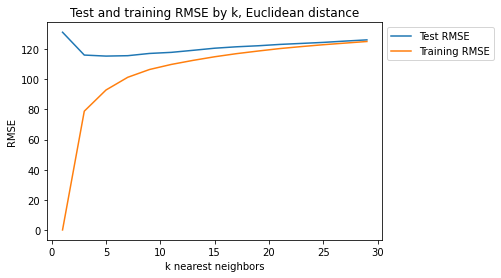

In [26]:
plt.plot(ks, test_rmse, label = "Test RMSE")
plt.plot(ks, train_rmse, label = "Training RMSE")
plt.xlabel("k nearest neighbors")
plt.title("Test and training RMSE by k, Euclidean distance")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1, 1))

### Forward feature selection

In [27]:
selected_index = for_feat_sel(10, 5, X_train, y_train)
predictors = df_no_date.columns[(df_no_date.columns != "cnt")]
predictors = predictors[selected_index]
print("Best {} predictors: {}".format(len(predictors), predictors))

num features: 1; rmse: 134.60
num features: 2; rmse: 109.92
num features: 3; rmse: 68.04
num features: 4; rmse: 58.43
num features: 5; rmse: 56.92
num features: 6; rmse: 56.25
num features: 7; rmse: 55.63
num features: 8; rmse: 55.21
num features: 9; rmse: 54.84
num features: 10; rmse: 54.84
Best 10 predictors: Index(['instant', 'hr', 'workingday', 'weathersit_3', 'weekday_5', 'season_1',
       'weekday_6', 'weekday_0', 'yr', 'holiday'],
      dtype='object')


In [28]:
X = df_no_date[predictors].values
y = df_no_date['cnt'].values

# pf = PolynomialFeatures(2)
# X_poly = pf.fit_transform(X)

scaler = StandardScaler()
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [29]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute', p=1)
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')
best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 7, best test RMSE: 50.2


In [30]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
knn = KNeighborsRegressor(n_neighbors=7, algorithm='brute', p=1) 
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [31]:
rmse(predictions, y_test)

51.16740022888941

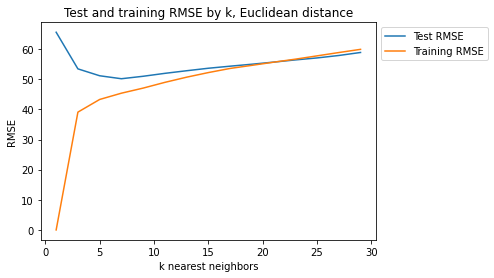

In [32]:
plt.plot(ks, test_rmse, label = "Test RMSE")
plt.plot(ks, train_rmse, label = "Training RMSE")
plt.xlabel("k nearest neighbors")
plt.title("Test and training RMSE by k, Euclidean distance")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1, 1))

## LinearRegression

In [33]:
df_no_date

,instant,yr,mnth,hr,holiday,workingday,temp,hum,windspeed,cnt,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,1,0,0,0,0.24,0.81,0.0000,16,...,0,0,0,0,0,1,1,0,0,0
1,2,0,1,1,0,0,0.22,0.80,0.0000,40,...,0,0,0,0,0,1,1,0,0,0
2,3,0,1,2,0,0,0.22,0.80,0.0000,32,...,0,0,0,0,0,1,1,0,0,0
3,4,0,1,3,0,0,0.24,0.75,0.0000,13,...,0,0,0,0,0,1,1,0,0,0
4,5,0,1,4,0,0,0.24,0.75,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,0.26,0.60,0.1642,119,...,1,0,0,0,0,0,0,1,0,0
17375,17376,1,12,20,0,1,0.26,0.60,0.1642,89,...,1,0,0,0,0,0,0,1,0,0
17376,17377,1,12,21,0,1,0.26,0.60,0.1642,90,...,1,0,0,0,0,0,1,0,0,0
17377,17378,1,12,22,0,1,0.26,0.56,0.1343,61,...,1,0,0,0,0,0,1,0,0,0


In [34]:
predictors = df_no_date.columns[(df_no_date.columns != "cnt")&(df_no_date.columns != 'registered')&(df_no_date.columns != 'casual')]
X = df_no_date[predictors].values
y = df_no_date['cnt'].values

pf = PolynomialFeatures(2)
X_poly = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=0)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
predictions = lreg.predict(X_test)

In [35]:
rmse(predictions, y_test)

120.53551035256672